In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display

#### Tips Dataset
- `total_bill`: Total bill (cost of the meal), including tax, in US dollars
- `tip`: Tip (gratuity) in US dollars
- `gender`: Gender of person paying for the meal (male, female)
- `smoker`: Smoker in party? (0=No, 1=Yes)
- `day`: name of day of the visit
- `time`: time of visit (Lunch,Dinner)
- `people`: number of people of the party

In [2]:
df = pd.read_csv('./datasets/tips.csv')

display(df.info())
display(df.head(3))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
gender        244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
people        244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


None

,total_bill,tip,gender,smoker,day,time,people
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


,total_bill,tip,people
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Simple Linear Regression
- Model: $\hat{y} = \theta_0\ x + \theta_1$

#### Gradient Descent Optimization with MSE
$\begin{cases}
    \text{Gradient: } \frac{\delta\ L(\theta_t\ , Y)}{\delta\ \theta} \\
    \text{MSE Loss function: } L(\theta_t\ , Y) = \frac{1}{n}\ \sum\limits_{i=1}^n(y_i - \hat{y}_i)^2 \\
    \text{Simple Linear Regression Model: } \hat{y}_i = \theta_0\ x_i + \theta_1
\end{cases}$  

$\begin{align*}
\to \text{Gradient: } \frac{\delta\ L(\theta_t\ , Y)}{\delta\ \theta} &= \frac{\delta}{\delta\ \theta}\ \left[ \frac{1}{n}\ \sum\limits_{i=1}^n(y_i - \hat{y}_i)^2 \right] \\
    &= \frac{1}{n}\ \sum\limits_{i=1}^n\ \left[ (-2)\ (y_i - \hat{y}_i)\ \frac{\delta}{\delta\ \theta} (\theta_0\ x_i + \theta_1) \right] \\
    &= \frac{-2}{n}\ \sum\limits_{i=1}^n\ \left[(y_i - \hat{y}_i)\ \frac{\delta}{\delta\ \theta} (\theta_0\ x_i + \theta_1) \right] \\
    &= \frac{-2}{n}\ \sum\limits_{i=1}^n\ \left[(y_i - \hat{y}_i)\ \frac{\delta}{\delta\ \theta_0} (\theta_0\ x_i + \theta_1) \right] + \frac{-2}{n}\ \sum\limits_{i=1}^n\ \left[(y_i - \hat{y}_i)\ \frac{\delta}{\delta\ \theta_1} (\theta_0\ x_i + \theta_1) \right] \\
    &= \frac{-2}{n}\ \sum\limits_{i=1}^n\ \left[(y_i - \hat{y}_i)\ x_i \right] + \frac{-2}{n}\ \sum\limits_{i=1}^n\ \left[(y_i - \hat{y}_i) \right] \\
    &= \frac{-2}{n}\ \sum\limits_{i=1}^n\ \left[(y_i - \hat{y}_i)\ (x_i + 1) \right]
\end{align*}$

- Gradient Descent functions  
$\begin{cases}
    \text{Gradient = } \frac{-2}{n}\ \sum\limits_{i=1}^n\ \left[(y_i - \theta_0\ x - \theta_1)\ (x_i + 1) \right] \\
    \text{Update theta: } \theta_{t+1} = \theta_t - \alpha * \text{Gradient}
\end{cases}$

In [3]:
def gradient(X, y, thetas):
    '''
    Gradient function for 
        Simple linear regression model: y_pred = theta_0 * X + theta_1
        MSE loss
    '''
    n = X.shape[0]
    return (-2.0/n) * ((y-thetas[0]*X-thetas[1])*(X+1)).sum()

def update_thetas(thetas, gradient, alpha=0.001):
    return thetas - (alpha * gradient)

In [4]:
def mse_loss(y_pred, y):
    '''
    Loss function: Mean squared error
    '''
    return ((y_pred - y)**2).mean()

def model(thetas, X):
    '''
    Simple linear regression model: y_pred = theta_0 * X + theta_1
    '''
    return thetas[0]*X + thetas[1]

In [5]:
import random 

def fit(X, y, epsilon=0.001, alpha=0.001):
    thetas = np.array([random.uniform(0, 1), random.uniform(0, 1)])

    iters = 0
    while True:
        # compute gradient
        grad = gradient(
            X=X, y=y,
            thetas=thetas)

        # update theta
        new_thetas = update_thetas(
            thetas=thetas,
            gradient=grad,
            alpha=0.001)

        # Update model
        y_pred = model(thetas, X)
        loss = mse_loss(y_pred, y)

        # Print
        iters += 1
        print('#### iter {} ####'.format(iters))
        print('Gradient: {:.3f}'.format(grad))
        print('theta: [{:.2f}, {:.2f}]'.format(new_thetas[0], new_thetas[1]))
        print('loss: {:.3f}'.format(loss), end='\n\n')

        # stopping condition
        diff = abs(new_thetas - thetas)
        if (diff[0] < epsilon and diff[1] < epsilon):
            thetas = new_thetas
            break

        thetas = new_thetas
    
    # Plot
    ## Plot actual values 
    plt.scatter(x=X, y=y)

    ## Plot best fit line of predictions
    plt.plot(X, thetas[0]*X + thetas[1],
        color = 'y')

    ## Config
    plt.axis ('tight')
    plt.xlabel('Total bill')
    plt.ylabel('Tips')
    plt.show()

#### iter 1 ####
Gradient: 420.295
theta: [0.11, 0.53]
loss: 87.486

#### iter 2 ####
Gradient: -9.233
theta: [0.12, 0.53]
loss: 1.103

#### iter 3 ####
Gradient: 0.203
theta: [0.12, 0.53]
loss: 1.061

#### iter 4 ####
Gradient: -0.004
theta: [0.12, 0.53]
loss: 1.061



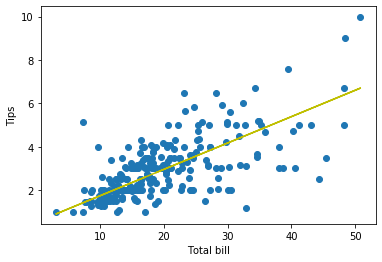

In [6]:
fit(X=df['total_bill'],
    y=df['tip'],
    epsilon=0.00001, alpha=0.001)